In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')  #ensure that any special characters in the text are correctly interpreted and displayed in our program


In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2103,ham,Its a site to simulate the test. It just gives...,NaN,NaN,NaN
2903,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I...,NaN,NaN,NaN
2522,ham,Dunno lei... I might b eatin wif my frens... I...,NaN,NaN,NaN
4989,spam,Phony å£350 award - Todays Voda numbers ending...,NaN,NaN,NaN
2225,ham,Alrite jod hows the revision goin? Keris bin d...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#Process
# 1. Data Cleaning
# 2. Data analysis
# 3. Text preprocessing
# 4. Model Building
# 5. Improvement
# 6. Website

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True) #inplace mean we can not need to make the other object
df.sample(5)

,v1,v2
4017,ham,"\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\"""""
891,ham,I am great princess! What are you thinking abo...
59,ham,Yes..gauti and sehwag out of odi series.
3140,ham,Customer place i will call you
4077,ham,Gam gone after outstanding innings.


In [9]:
# temp = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
# temp.sample(5)

In [10]:
#rename the columns
df.rename(columns={'v1':'target', 'v2':'index'}, inplace=True)
df.sample(5)

,target,index
4870,ham,Well. You know what i mean. Texting
406,ham,All was well until slightly disastrous class t...
3866,ham,"Alright we're hooked up, where you guys at"
2611,spam,Knock Knock Txt whose there to 80082 to enter ...
1198,ham,Al he does is moan at me if n e thin goes wron...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()    # its transform name to digital number for understanding


In [12]:
df['target']=encoder.fit_transform(df['target'])
df.head(5)

,target,index
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check for null value and duplicate value  this is very import for any data
df.isnull().sum()

target    0
index     0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
#remove duplicates
temp=df.drop_duplicates(keep='first')  #drop_duplicates() is a method in Pandas library which is used to remove duplicate rows from a DataFrame.
temp.duplicated().sum()

0

In [16]:
temp.head(5)

,target,index
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
temp.shape

(5169, 2)

In [18]:

df=df.drop_duplicates(keep='first')  #drop_duplicates() is a method in Pandas library which is used to remove duplicate rows from a DataFrame.
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# Data analysis


In [20]:
df.head()

,target,index
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [22]:
import matplotlib.pyplot as plt

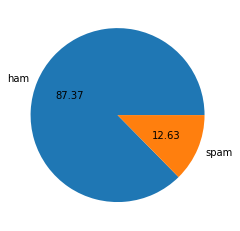

In [23]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [24]:
#data is imbalanced
import nltk #Natural language tool kit

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters']=df['index'].apply(len)   # for Number of characters
df.head()

,target,index,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
df['num_words']=df['index'].apply(lambda x:nltk.word_tokenize(x))    #it's return list
df.sample(5)

,target,index,num_characters,num_words
518,0,That way transport is less problematic than on...,168,"[That, way, transport, is, less, problematic, ..."
119,1,PRIVATE! Your 2004 Account Statement for 07742...,144,"[PRIVATE, !, Your, 2004, Account, Statement, f..."
3720,0,Blank is Blank. But wat is blank? Lol,37,"[Blank, is, Blank, ., But, wat, is, blank, ?, ..."
1184,0,"Yo, you around? Just got my car back",36,"[Yo, ,, you, around, ?, Just, got, my, car, back]"
4526,0,Understand. his loss is my gain :) so do you w...,58,"[Understand, ., his, loss, is, my, gain, :, ),..."


In [28]:
df['num_words']=df['index'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(5)

,target,index,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#another way of counting the word

# def split_text_into_words(text):
#     words = text.split()
#     return words

# df['words'] = df['index'].apply(split_text_into_words)
# df.head()

In [30]:
df['num_sentences']=df['index'].apply(lambda x:nltk.sent_tokenize(x))  #it's also return list
df.head()

,target,index,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [31]:
df['num_sentences']=df['index'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,index,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()     #check the maximum words,characters and sentences

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#for ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

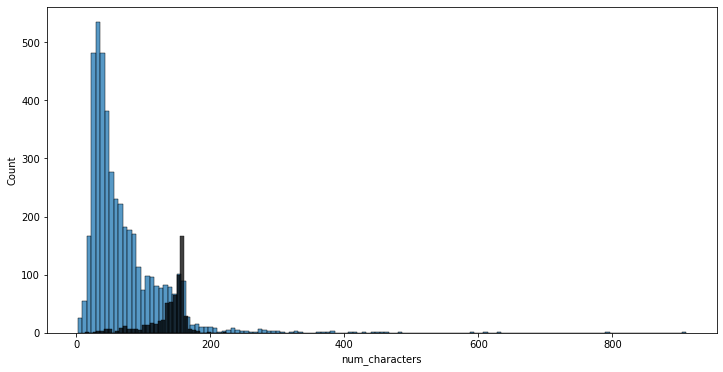

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='black')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

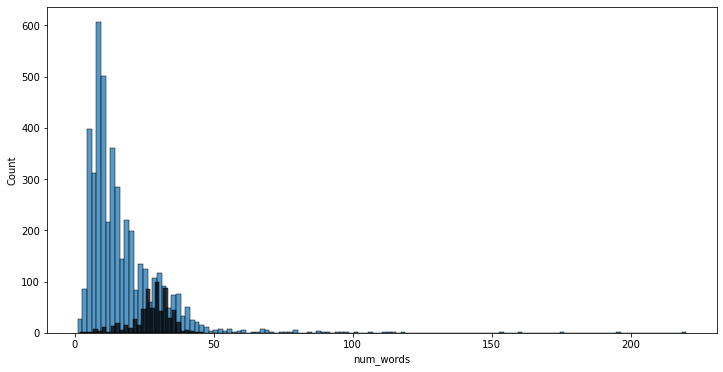

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='black')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

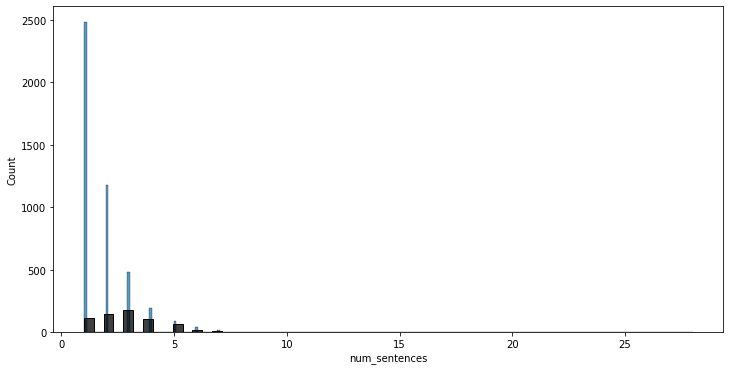

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='black')

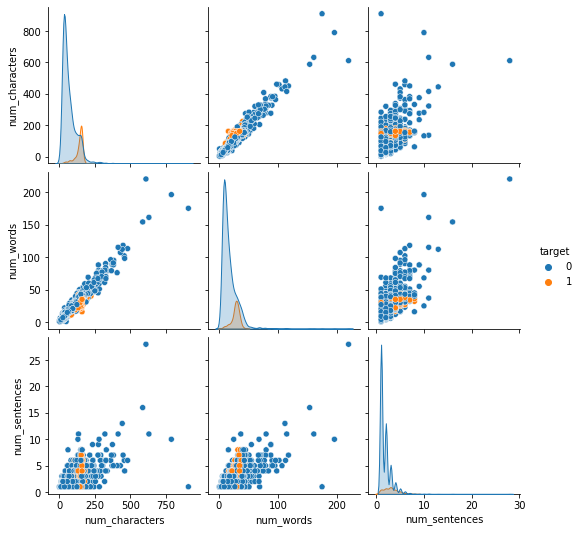

In [39]:
sns.pairplot(df,hue='target')

In [40]:
df.corr()  #corelation and coeficient

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

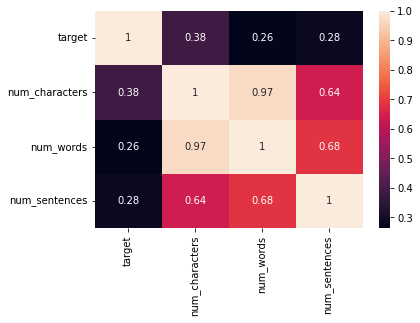

In [41]:
#heatmap for corelation and coeficient

sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

=>Lower Case
=>Tokenizaion
=>Removing Special characters
=>Removing stop words and punctuation
=>Stemming


In [42]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():  #for remove the special character(ex: ???\'')
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
transform_text("HI dancing locing 'MY' NAME IS ???\ PRUTHIK????")    #testing  

'hi danc loce name pruthik'

In [45]:
df['transform_text']=df['index'].apply(transform_text)
df.head(5)

,target,index,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\jayga\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [48]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=''))

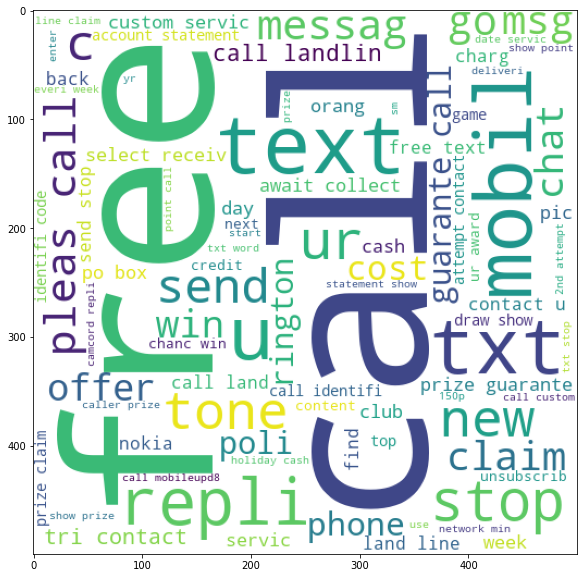

In [49]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

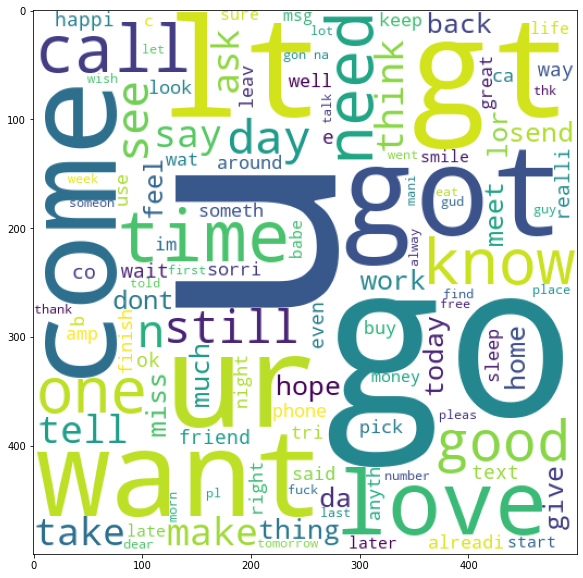

In [50]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=''))
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

In [51]:
df.head(5)

,target,index,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_words=[]
for word in df[df['target']==1]['transform_text']:
    for i in word.split():
        spam_words.append(i)
        

In [53]:
len(spam_words)

9939

In [54]:
words_ham=[]
for word in df[df['target']==0]['transform_text']:
    for i in word.split():
        words_ham.append(i)

In [55]:
len(words_ham)

35394

In [56]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(30))       #it return dictionary of counter the words



,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [57]:
pd.DataFrame(Counter(spam_words).most_common(30)[1])

,0
0,free
1,191


c:\users\jayga\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


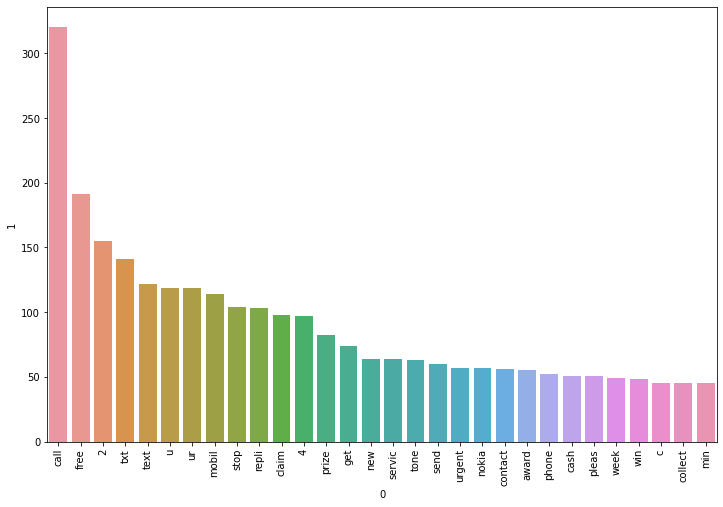

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

c:\users\jayga\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


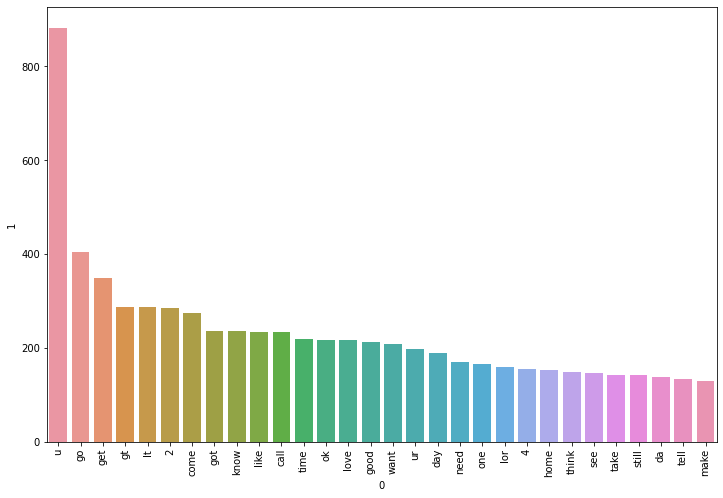

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(words_ham).most_common(30))[0],pd.DataFrame(Counter(words_ham).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building 


In [60]:
#Naive based algorithm is very good on textual data so we are using naive based algorithm here. 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [61]:
X1=cv.fit_transform(df['transform_text']).toarray()  #convert textural data to value data
print(X1)
X1.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(5169, 6708)

In [62]:
y1=df['target'].values
print(y1)
y1.shape

[0 0 1 ... 0 0 0]


(5169,)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2, random_state=2) #80% traning data and 20% testing data

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y1_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y1_pred1))
print(confusion_matrix(y_test,y1_pred1))
print(precision_score(y_test,y1_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [68]:
mnb.fit(X_train,y_train)
y1_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y1_pred2))
print(confusion_matrix(y_test,y1_pred2))
print(precision_score(y_test,y1_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [69]:
bnb.fit(X_train,y_train)
y3_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y3_pred3))
print(confusion_matrix(y_test,y3_pred3))
print(precision_score(y_test,y3_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [70]:
#precision high it means that few false positive we can get positive result
#precisin law it means that high false positive we can get less positive result

In [71]:
tfidf=TfidfVectorizer(max_features=3000)    #Term Frequency-Inverse Document Frequency

In [72]:
X=tfidf.fit_transform(df['transform_text']).toarray()  #convert textural data to value data
print(X)
X.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(5169, 3000)

In [73]:
y=df['target'].values
print(y)
y.shape

[0 0 1 ... 0 0 0]


(5169,)

In [74]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2) #80% traning data and 20% testing data

In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\jayga\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc =KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc =AdaBoostClassifier(n_estimators=50, random_state=2)
bc =BaggingClassifier(n_estimators=50, random_state=2)
etc =ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc =GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb =XGBClassifier(n_estimators=50, random_state=2)

In [104]:
lrc.fit(X_train,y_train)
y_pred1=lrc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9584139264990329
[[893   3]
 [ 40  98]]
0.9702970297029703


In [81]:
etc.fit(X_train,y_train)
y_pred1=etc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9748549323017408
[[893   3]
 [ 23 115]]
0.9745762711864406


In [82]:
gbc.fit(X_train,y_train)
y_pred1=gbc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9477756286266924
[[888   8]
 [ 46  92]]
0.92


In [83]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print('Precision Score:',precision_score(y_test,y_pred2))

Accuracy: 0.9709864603481625
[[896   0]
 [ 30 108]]
Precision Score: 1.0


In [84]:
def train_classifier(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_prediion=classifier.predict(X_test)
    accuracy= accuracy_score(y_test,y_prediion)
    precison= precision_score(y_test,y_prediion)
    print(f'Accuracy:{accuracy} and Precision:',precison)
#     return accuracy,precison

In [85]:
train_classifier(gbc,X_train,X_test,y_train,y_test)

Accuracy:0.9477756286266924 and Precision: 0.92


In [86]:
train_classifier(etc,X_train,X_test,y_train,y_test)

Accuracy:0.9748549323017408 and Precision: 0.9745762711864406


In [87]:
train_classifier(svc,X_train,X_test,y_train,y_test)

Accuracy:0.9758220502901354 and Precision: 0.9747899159663865


In [88]:
train_classifier(lrc,X_train,X_test,y_train,y_test)

Accuracy:0.9584139264990329 and Precision: 0.9702970297029703


In [89]:
train_classifier(dtc,X_train,X_test,y_train,y_test)

Accuracy:0.9323017408123792 and Precision: 0.8333333333333334


In [90]:
train_classifier(gnb,X_train,X_test,y_train,y_test)

Accuracy:0.8694390715667312 and Precision: 0.5068493150684932


In [91]:
train_classifier(mnb,X_train,X_test,y_train,y_test)  #Multinomial Naive Bayes

Accuracy:0.9709864603481625 and Precision: 1.0


In [92]:
train_classifier(bnb,X_train,X_test,y_train,y_test)

Accuracy:0.9835589941972921 and Precision: 0.991869918699187


In [93]:
train_classifier(knc,X_train,X_test,y_train,y_test)

Accuracy:0.9052224371373307 and Precision: 1.0


In [94]:
#Now Using min-max Scaler for checking acuracy or Precision
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X1=scaler.fit_transform(X)

In [95]:
X_train1, X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.2, random_state=2) #80% traning data and 20% testing data

In [96]:
def train_classifier1(classifier,X_train1,X_test1,y_train1,y_test1):
    classifier.fit(X_train1,y_train1)
    y_prediction1=classifier.predict(X_test1)
    accuracy= accuracy_score(y_test1,y_prediction1)
    precison= precision_score(y_test,y_prediction1)
    print(f'Accuracy:{accuracy} and Precision:',precison)

In [97]:
train_classifier1(gbc,X_train1,X_test1,y_train1,y_test1)

Accuracy:0.9477756286266924 and Precision: 0.92


In [98]:
train_classifier1(mnb,X_train1,X_test1,y_train1,y_test1)  #here get precision low compare to without using min-max scaler 

Accuracy:0.9787234042553191 and Precision: 0.9461538461538461


In [99]:
train_classifier1(knc,X_train1,X_test1,y_train1,y_test1)

Accuracy:0.9052224371373307 and Precision: 0.9761904761904762


In [100]:
#Voting Classifier using min max scaler
from sklearn.ensemble import VotingClassifier
svc1 = SVC(kernel = 'sigmoid', gamma=1.0, probability=True)
knc1 =KNeighborsClassifier()
mnb1=MultinomialNB()
voting=VotingClassifier(estimators=[('sv',svc1),('kn',knc1),('mn',mnb1)],voting='soft')
voting.fit(X_train1,y_train1)
y_pred=voting.predict(X_test1)
print('Accuracy_Score:',accuracy_score(y_test1,y_pred))
print('Precision_Score:',precision_score(y_test1,y_pred))

Accuracy_Score: 0.9796905222437138
Precision_Score: 0.9915966386554622


In [101]:
#Applying Stacking
from sklearn.ensemble import StackingClassifier
final_estimator = RandomForestClassifier()
clf=StackingClassifier(estimators=[('sv',svc1),('kn',knc1),('mn',mnb1)], final_estimator=final_estimator)
clf.fit(X_train1,y_train1)
y_pred1=voting.predict(X_test1)
print(accuracy_score(y_test1,y_pred1))
print(precision_score(y_test1,y_pred1))

0.9796905222437138
0.9915966386554622


In [103]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))